# Hands on Machine Learning, Building a Neural Net Model

Chapter 3 from "Hands on Maching Learning with Scikit-learn, Keras and Tensorflow" by Geron

Using the MNIST numbers set

Using a simple perceptron neural net system

Updated January 2023

## Yes, you are being thrown into the deep end of the pool

The lecture material for the coming week will start to explain this in more detail,  if you feel lost during tonight's
exercise,  it's not your fault, but mine.

Work through this exercise with your pair programming partner,  ask questions, talk to me, do some reading.

You will be able to then relate what happened tonight to the lectures and to the next homework.

## Step 0:  load a classic example data set and understand how it is formated or structured

This is a data prep phase

Note- Python starts array indexes with zero every time!

Second Note- I use the terms scikit-learn and the short version of the name sklearn as well.  This is the same package, we'll see a lot of it.

Load the data set,  same tactic as in the text

This is using one of the standard datasets in ML,  the MNist numbers set.  We are using an scikit-learn (sklearn) utility to load it.

Note the import statement here to load the package- this will run slowly the first on a given computer,  it download the data from a repository

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/Users/mschmidt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Many software tools come with these built in datasets that are really helpful in learning
how the tools work

It is always important to understand how these example data sets are structured,  because it will be necessary to format new data into the form need for the software tool.  This is typically the most tedious, time consuming and annoying part of the process.

When looking at examples,  we really need to understand the data formats.

In many packages or libraries used in R and Python,  much of the package actually consists
of definitions of storage classes or objects to make data handling easier for the calculations done in the package- so you will see new storage classes constantly,  be aware of them

In [15]:
?mnist

# Question/Action

Okay, a bunch is kind of an odd object

How does it appear to relate to a database like MongoDB? or other systems that use JSON like data storage

*Try to connect novel data formats to formats you are more familiar with.  Despite all the different names and formats, there are only a few underlying conceptual ideas.*

What does the data look like?   Here we assign the data to X and the target (aka label) to y

In [6]:
X,y=mnist["data"],mnist["target"]
print(X.shape)
print (y.shape)

(70000, 784)
(70000,)


In [16]:
?X


It is in linear arrays of 784 values, these are 28 by 28 images, stored as linear vectors.    Each line is a 28x28 image black and white image.    

We have 70,000 data points (images) one per line in the variable X, X are the predictor variables for this system, which are actually images.

Y are the targets or labels


Use the magic command  (which is Jupyter notebook command, rather than a Python command)  %matplotlib inline,   which causes the Python matplotlib package functions to plot to the Jupyter Notebook - you will want to use this command a lot.

In [17]:
%matplotlib inline

We'll plot a couple of the images, by reshaping them to 28 x 28 matrices and then using imshow to plot them

There is a convention for storing images in rows like this.

The image we have here are black and white and have only one color channel (black to white).   Color images have three channels (aka layers),  R, G, B.    

Images are stored in 3 D matrices,   usually as indexed as [channel, row, column]

For the MNIST digit images we have images that are 1 x 28 x 28

Below we convert on image on a row of the data matrix X into a 28 by 28 matrix we can plot


See:

https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/

Note the use of the reshape function,  were reshaped a 1 by 784 linear structure into a
28 by 28 matrix.   There are a number of ways of doing this

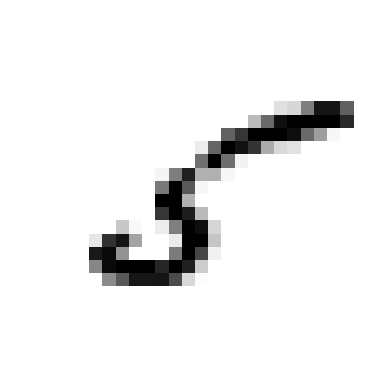

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# X is a pandas data frame,   X.iloc[0] is a pandas series containing
#  row zero of the dataframe, we then force it to be a numpy array, which can be reshaped
# into a matrix

some_digit = X.iloc[11].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

What is the target for this image?

In [19]:
y[0]

'5'

# Question/Action

Use google to look up the reshape function

What options are there on how to carry out the reshaping?   copy the cell above that does
the reshaping and plotting and use a different option for reshaping.  What happens?

In [20]:
numpy.reshape(a, newshape, order='C')

NameError: name 'numpy' is not defined

At this point,  make some changes to look at some other images,   pick and image number at random and plot it.



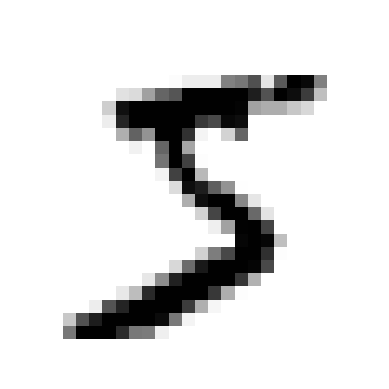

In [10]:
some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

Notice here that the target or label,  y,  is an integer value.

mnist["feature_names"] should show us the names associated with the integer coded target numbers,   print out the feature names

This is a manual split of the data into a training set and a test set.  We will only use the test set at the very end to look
the performance of the system.  This is common in machine learning, using a test set to characterize how well the system works.   

Here the first 60,000 points are used as a training set

Note: Using the first 60,000 as training and the rest as a test is not a good way to do this.  The data should be randomly split, not sequentially- think about why--

Later, we will see some better tools for creating test and train sets

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

We are doing a binary classification,  so the outcome is true or false

We could do a more complex classification,  into all 10 categories, but that's a more complex task

We will create a neural net that can recognize the image of a number "5"

the label or target y is currently a set of numbers 0 to 9,   we want a set of true and false labels, indicating wheter the object is a '5' or not

In [12]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

## Part 1: Construction of a neural net classification Model

Followed by model training and then a bit of a look at the object that holds the classifier model

We are going to use a neural net,   a perceptron classifier from sklearn

A number of issues to discuss here-

a.) This is a simple Machine Learning Classifier,  using 3 hidden layers, each with 20, 10 and 5 neurons respectively.  Note that input layer must have 784 neurons to handle the input data, while the output layer will have 2, the probabilities of each output category, true or false
    
b.) MLPClassifier is a more limited approach than using Tensorflow, but it does work reasonable

Some details:

The MLPClassifier sets the number of input neurons to be equal to the number of variables in the input data,  in this case we will have 784 input neurons

The list of hidden layer sizes input to the function indicates we want 3 hidden layers of sizes 20,10,5 neurons respectively.  I got better performance using 100,50, 20 or so,  you may want to try altering or tinkering with the number of neurons per layer or the number of layers or both.   The number of neurons and layers are called "hyper-parameters" of the model.   Training will take much longer with a bigger network.

The output layer of the net work will have a number of outputs equal to the number of classes used.

The verbose=True entry indicates that the training procedure will give us an a constant updating on progress,  indicating the "loss" which is the value of the objective or error function being used.  Most classifiers use the cross-entropy objective (loss) function,   which is what is being used here

The solver is "adam" which is one implementation of a gradient descent,

alpha is an L2 regularization parameter- more on regularization later- this is meant to reduce overfitting problems

warm start=False indicates the training starts from a new random set of parameters (weights) instead of starting from the results of the last training operation by the member function fit.

The learning rate,  tolerance and other parameters are all set to the default values,  see the sklearn manual below for more information


There is a nice discussion of the model at

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Look at the website above before you run the model

Here we create an instance of a classifier with the desired structure and operating parameters

We then fit the model to the training predictors X_train and the labels (or targets) y_train_5

Sklearn models all work this way

The fitting process will run rather slowly,  it will typically end at roughly 100 iterations,   maybe 2 to 5 minutes run time at maximum

In [13]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(20,10,5), verbose=True, warm_start=False)

clf.fit(X_train, y_train_5)


Iteration 1, loss = 0.27028725
Iteration 2, loss = 0.08038020
Iteration 3, loss = 0.05730453
Iteration 4, loss = 0.04481164
Iteration 5, loss = 0.03709973
Iteration 6, loss = 0.03257554
Iteration 7, loss = 0.02849133
Iteration 8, loss = 0.02612611
Iteration 9, loss = 0.02331228
Iteration 10, loss = 0.02080288
Iteration 11, loss = 0.02111216
Iteration 12, loss = 0.01944051
Iteration 13, loss = 0.01709165
Iteration 14, loss = 0.01835985
Iteration 15, loss = 0.01533054
Iteration 16, loss = 0.01499016
Iteration 17, loss = 0.01485069
Iteration 18, loss = 0.01697584
Iteration 19, loss = 0.01405011
Iteration 20, loss = 0.01303383
Iteration 21, loss = 0.01315584
Iteration 22, loss = 0.01113020
Iteration 23, loss = 0.01008129
Iteration 24, loss = 0.01112593
Iteration 25, loss = 0.01120978
Iteration 26, loss = 0.01013892
Iteration 27, loss = 0.01031233
Iteration 28, loss = 0.01001620
Iteration 29, loss = 0.00716660
Iteration 30, loss = 0.00735298
Iteration 31, loss = 0.00782974
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10, 5), max_iter=500,
              random_state=1, verbose=True)

clf is an object,  an instance of the class MLPClassifier,   which has a lot of stored data, like the model structure,
all the fitted parameter values

We can use the dir() member function of clf to see what member functions and variables are within the clf object

In [21]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_parameter_constraints',
 '_predict',
 '_random_state',
 '

All sklearn model classes have a fit() and a predict() member function,  we can predict values using a trained model
using the predict member function

# Question/Action

What type of object is X_test?

I had to change the code in the line below

    clf.predict(X_test.iloc[:10,:])

When I ran it in January 2022,  it was

    clf.predict(X_test[:10,:])

Why would code that ran fine in 2022 no longer work in 2023

In [ ]:
# run code here - what type of data is X_test


# why doesn't X_test[:10,:] work, but X_test.iloc[:10,:] does?

# Predictions

We have trained the model in clf, we will now use it to predict the class of our
first 10 test images

In [22]:
clf.predict(X_test.iloc[:10,:])

array([False, False, False, False, False, False, False, False,  True,
       False])

Notice that clf.predict gave us true/false values,   assignments to specific categories of the number equaling 5 or not

These are some options, we can get a probability estimate

In [23]:
clf.predict_proba(X_test.iloc[:10,:])

array([[1.00000000e+00, 2.37103370e-23],
       [1.00000000e+00, 6.80210815e-12],
       [1.00000000e+00, 2.96784745e-25],
       [1.00000000e+00, 2.66165740e-19],
       [1.00000000e+00, 5.87174740e-32],
       [1.00000000e+00, 4.99631291e-40],
       [9.99999959e-01, 4.13134425e-08],
       [9.99915556e-01, 8.44436146e-05],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.04175145e-26]])

we can now look at the number of iterations used in fitting the model

In [24]:
clf.n_iter_



93

# Question
Find out what the activation function was,   what the tolerance value was, and the learning rate was

In [26]:
# clf.activation
# clf.tol
# clf.learning_rate
# The system was using a ReLu activation function. The tolerance value was .0001. The learning rate was constant.      

'constant'

In [27]:
# Question
# How many features where there in the input layer?   is this what you expected?
# This is what I expected as it is the number of pixels in the images from above. 

clf.n_features_in_

Object `expected` not found.


784

# Part 2:  How well does this classifier actually work?

We will use a number of different types of measures and metrics of performance from sklearn

Create a second version of the classifier, but with the verbose option set to false, so it will not show the
change in the cross entropy as the network is trained.



In [28]:
silent_clf = MLPClassifier(solver='adam',activation='relu', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(20,20,5), verbose=False, warm_start=True)

Below is a manual cross validation to look at the correct classification rate

We want to estimate how likely the model (predictor) is going to be if we use it on new images

What we are doing is splitting the data into 3 sections (my_split=3) and training silent_clf on 2/3 of the data and testing how well it does on the remaining sections of the data.  The remaining 1/3 the model was not trained on is called the validation data

The performance of the method on the validation data is called a crossed validation estimate.  If we estimated the performance of the model on the training data, that would be called a resubstitution estimate of the performance.     

If we had totally new, unused data that we use to estimate performance, that is called a test set estimate.

Note- this requires 3 separate fittings of the model, it will be slow

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

my_splits=3

# this splits the data into the training "fold" and the test fold

skfolds = StratifiedKFold(n_splits=my_splits,shuffle=True, random_state=42)


for train_index, test_index in skfolds.split(X_train, y_train_5):
    # make a clone of the model
    clone_clf = clone(silent_clf)
    #set up the test and train sets from the fold or split of the data
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5[test_index]
    # fit the cloned model to the data and predict the outcomes for the training set
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    # compute the number of times the the predicted class was correct
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.99235
0.9928
0.99225


We are up around 99% or higher rate of correct assignments.  Pretty cool.

But this is an unbalanced set,  10% of the data are "5"s,   90%  are not

If we simply made a predictor that always returned "False" it would be 90% correct

Here is a better way to do this, using a built-in function to do the cross validation, using a built-in sklearn function

Notice here a whole set of predictions created by the model,  all in one function call

In [30]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(silent_clf, X_train, y_train_5, cv=3)

# Question

In general,   resubsitution rates are untrustworthy.  Why?

We prefer independent test results over cross validation estimates,  why is this?

Why are cross validation estimates easier to obtain and work with?

In [ ]:
# It is untrustworthy because it has been tuned to a specific data set and could be biased towards it. 

# Independent test results are better used to avoid over fitting. 

# They are simple to understand and generally are less biased than other methods. 

Next we will create a confusion matrix to look at the performance of the model

The ideas related to classification metrics, confusion matrices and ROC curves are all discussed in Geron,  Chapter 3

https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch03.html#idm45022187098104

There is another discussion in Provost and Fawcett that is very business oriented

https://learning.oreilly.com/library/view/data-science-for/9781449374273/ch08.html#eightdot4_the_area_under_the_roc_curve_l


A confusion matrix shows the correct label (y) and the predicted category as labels on a matrix, so we can see what types of mistakes the classifier is making and how many

The columns are the predictions,   rows are the actual correct classes

          Prediction        
actual       {5}                 {not 5}
  {5}     | True Positives    False Negative |
 {not 5}  | False Positive    True Negative  |


In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)


array([[54377,   202],
       [  295,  5126]])

What is the fraction of correct classifications?

In [39]:
(54377 + 5126) / (54377 + 5126 + 202 + 295)

0.9917166666666667

In [34]:
n_correct = sum(y_train_pred == y_train_5)
print(n_correct / len(y_train_pred))

0.9917166666666667


In [40]:
from sklearn.metrics import precision_score, recall_score

#TP- True positive,   a positive y classed as positive
#FP- False positive,  a negative y classed as a positive

#FN  -False negative,   a positive y classed as negative
#T   -True negative,    a negative classed as a negative



# Precision = TP/(FP+TP)
print(precision_score(y_train_5, y_train_pred))

#recall,   TP/(TP+FN)
print(recall_score(y_train_5, y_train_pred))

0.9620870870870871
0.9455819959417082


In your one words,  what is Precision?  What is recall?   

Precision - true positives divided by all positives
Recall- true positives divided by true positives and false negatives combined

 ## Part 3:  More advanced ideas on describing classifier behavior


We can plot precision and recall as a function of the Threshold

The output of the classifier as a probability value allows us to decide which category to assign each specimen.

We would state a classification rule such as:

If probability of class 1 for a specimen is greater than the threshold level,  assign the specimen to class 1,  if not assign
it to class 2.

Changing the threshold value alters the number of TP, FP, TN an FN results we will see and thus
the precision and recall.

Plotting precision and recall is helpful in understanding the model behavior

In [41]:
y_scores = cross_val_predict(silent_clf, X_train, y_train_5, cv=3,
                             method="predict_proba")

In [42]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores[:,1])

In [43]:
print(precisions)

[0.09035    0.09035151 0.09035301 ... 0.99737533 0.99721836 1.        ]


This is a precision-recall curve

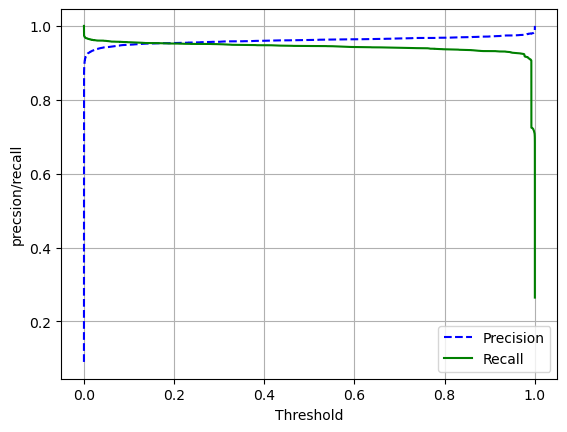

In [44]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()
    plt.grid()
    plt.ylabel("precsion/recall")
    plt.xlabel("Threshold")
    [...] # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### The receiver-operator curve

This works great for binary classifiers such as this one

It plots the TP rate verses the FP rate,  both are altered by changing the threshold level.

In a perfect model,  changing the thresshold will have no effect on the outputs, and the area under the RC curve will be 1.

For a random classification,  p=0.5 for all models, and we get the dashed line in the plot, and an area under the curve of 0.5

Here's what this looks like

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores[:,1])

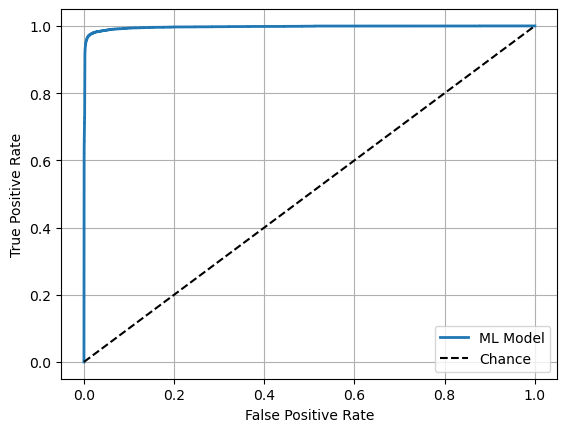

In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label="ML Model")
    plt.plot([0, 1], [0, 1], 'k--',label="Chance") # Dashed diagonal
    plt.legend() # Add axis labels and grid
    plt.grid()
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")

plot_roc_curve(fpr, tpr)
plt.show()

This is a really impressive ROC curve, there is a tiny rounding area in the upper right corner, that indicates some reduction
in the True Positive Rate when the False Positive rate is zero.

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores[:,1])

0.9966279085530817

# 4 Final Step:  evaluate the performance of your best model using the Test Data

Now let's look at the actual test set- this should be the last step in an analysis!

When you have the final model chosen, and you have optimized it and studied it and thrashed the living tar out of the input step,  you want to test that final model against the test data,  which you have never really looked at.

You only meet a test set for the first time once.   It is only "new" data once.   Remember that after you look at data, you are in an a-posteriori world,   not the a-priori world of new data.   (Remember the Monte Hall problem?).

So,  a test set is only useable once.   After that,  it could be training data, but never truly test data again.

### Overfitting and Underfitting

If your model is too simple,  it doesn't make full use of the information in the predictors X and has less than ideal peformance.   Your model has prediction bias, since it misses important features of the data

If your model is too complex,  it tries to be two precise or detailed for what you know about the data (ie you drew a regression line through all the points on a graph).   THis is called a prediction variance.

You want a model in the sweet spot between prediction and variance.


Predict on the X-test set (only once!) and then characterize performance

In [48]:
pred_test=clf.predict(X_test)

In [49]:
pred_test_prob=clf.predict_proba(X_test)

In [50]:
confusion_matrix(y_test_5, pred_test)

array([[9067,   41],
       [  33,  859]])

In [51]:
n_correct = sum(y_test_5 == pred_test)
print(n_correct / len(y_test_5))

0.9926


In [52]:
fpr, tpr, thresholds = roc_curve(y_test_5, pred_test_prob[:,1])

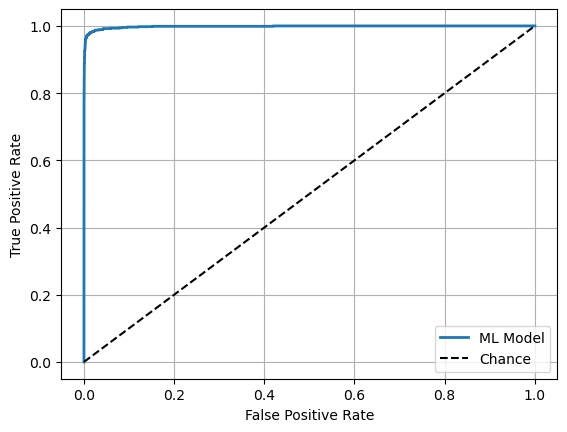

In [53]:
plot_roc_curve(fpr, tpr)
plt.show()

In [54]:
roc_auc_score(y_train_5, y_scores[:,1])

0.9966279085530817

In [55]:
roc_auc_score(y_test_5, pred_test_prob[:,1])

0.9981319088723067

# Questions

Is there any evidence of overfitting here?  

How could we look for signs of bias?

In [ ]:
# No, the test set did slightly better than the training set. If the training model was much higher than the test set, there would be both overfitting and bias.

## Coming up on the homework

1.) Use the cells of this example notebook to create a new classifier that uses all ten image classes,  meaning using y_train
rather than y_train_5.   This is a multiple category classifier rather than a binary classifier.

You may want to increase the number of neurons in the model.

Use the accuracy, precision and recall calculations, but not the ROC plot or the precision vs recall plots,  those don't work
for multiple category models.    Do calculate and look at the confusion matrix

2.) Load the MNIST Fashion data set, which is a tougher problem.   It is as set of black and white images of pieces of clothing


These are 28 x 28 greyscale images,  just as we saw above

Build a neural net classifier for this data set,attempt to optimize it and describe the performance as above.   Start with a
binary classifier to try to detect one particular clothing item,  then go on to try to classify using all ten categories